# LetsGrowMore(LGMVIP)-"DATA SCIENCE INTERN"
## LGMVIP May-22
### AUTHOR - WAGH SHUBHAM BALU
### TASK 3- MUSIC RECOMMANDATION SYSTEM
<b> Dataset link- https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data*

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#IMPORTING DATASETS
ntr = 7000
nts = 3000
data_path = r"D:\Programming\Lets Grow More\Beginner\Task 3 another code\train.csv"
train = pd.read_csv(data_path,nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(data_path,names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv(r"D:\Programming\Lets Grow More\Beginner\Task 3 another code\songs.csv")
members = pd.read_csv(r"D:\Programming\Lets Grow More\Beginner\Task 3 another code\songs.csv")

In [4]:
train.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [5]:
train.tail(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
6990,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,747MTbD6RQdVi/3jizF7wiJHwDLEOKsYxb/Mz6s9eH0=,search,Online playlist more,online-playlist,0
6991,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,K7VLKSHspemQ3O0vBACuqpRSYCsnckhTlApUOLaYj+A=,my library,Local playlist more,local-library,1
6992,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,hl0wKOEteB2q5lkaQPwdTDefhpfWPP4bTWJxcvwOdhA=,my library,Local playlist more,local-library,1
6993,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wYJ2OAr9+voXASDgoJjZXmxhrKI8HULW5PwI2RUyoDE=,my library,Local playlist more,album,1
6994,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,0GJzCi54j7M1GdSxmtfKaI8R+2Jq3iqlKt5qJIvtEsc=,my library,Local playlist more,local-library,1
6995,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,kU2L9oE7z8H2bB+2/h0ZuRjvJ5t0QheJyggAB1fV6ac=,search,Online playlist more,online-playlist,0
6996,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,M5jomDIbTepOkTFwYQ8CSAPObDTzPT93Uhc6+OMjtPk=,my library,Local playlist more,local-library,1
6997,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,w47lM8vYQxHnTEdTUxbCF3+qJlOZy2T+WBPAGaaEmT8=,my library,Local playlist more,local-library,1
6998,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,oU2T/lj1BsqWxNgh+xkmiBaPNYzNAoQj4zI1/mnjjiw=,search,Online playlist more,online-playlist,0
6999,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,1


In [6]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
4663,7H8Teyq/bk0vHVwbjT2+Otaz8vHTgdJHmfxwYm2P/K8=,a4TbK5V15pj3YZUOGa9h2U3t0OsE+3aiFw41mNlcgcw=,my library,Local playlist more,local-playlist,1
6068,6WJcmpudh5G498psJHALbIPb/NFtvr1GWUIpNsf5kLM=,JwJ9JJJJ7gVCmVqnHBid/PawxbgHUk2xhmbn8Fw39tU=,my library,Local playlist more,local-library,1
6636,8VWjZIkdCD9s5mSBhUAHDTiWd4TSnflmqTyBNes3Hg0=,6LdT9BiGIlQ3rJped7PACqnrzstFXz8dXD6MmmsA8uI=,my library,Local playlist more,local-library,1
2424,V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=,4+oY89VfVfYHPWSFj18mWvUBBUeCKsuRP/Ya1Pc53lE=,my library,Local playlist more,local-library,1
4233,hPn6PsLoyOC5xiXzK2PlsRL02GkVAc73d0F54KoBs0A=,Wn5ltxI7NsFk4xGFHOFXv2ajWU9HmuEgDF+xs1EJpFo=,my library,Local playlist more,local-library,1
4769,/Fc3ie2wEpNMw2PWmVhZ7Olh6tE5KMYburGooIpXY/Q=,vQnMLplv1IhQCaaTOlGcKpLX/yjsLTa2tw7RDaAHGcA=,my library,Local playlist more,local-library,1
3404,67srHylc0Cg0st01+Nn1ax8cIqIBPzEs8sWfskyc33g=,pdPzGB/GGkrzF6Jm9TzVIJyNoKQO7MN0W7mCCFU48kQ=,my library,Local playlist more,local-library,1
769,9Gl9/B771in9YaOVfh+j/nvwiRI1P99YdLmB+7c85vo=,i356q8t0P9emMJq8PsFkY6CGoi34mP3cgXuDpfEDyhY=,my library,Local playlist more,local-playlist,1
6692,w9pkbWt4qi/M2uFMS0rZaW5ZcudOPBfazZaWUGyhXdA=,ra6TLz6Y37OSFOqg4aCvjV7nalatCwZdQvoJRMwSNvk=,my library,Local playlist more,local-library,1
610,z8f9Ms1BVEl08/nOmya8RYBhAzOUUrZR7yfuzupprzI=,eqxzfyc6kVOcYTDo7GCguRsfLEplxdlJ+umjJsB8gdY=,my library,Local playlist more,local-library,1


In [7]:
train.shape

(7000, 6)

In [8]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [9]:
train.describe()

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [13]:
songs.head(35)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [12]:
songs.sample(50)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
1865700,6m7/8k11t/ryJ2Dfy6Pz8vY85AaLyNsk/CTCvkDIsMA=,197462,402,Manga Boys,Lucato| Summa,NaN,52.0
138256,HKf18j15892PWaO7jwqbBkuvbuMhGCXYfdYHXNVO1rs=,330221,465,Various Artists,永谷 喬夫,永谷 喬夫| 椎名 慶治,17.0
1033024,c4k1PNsSqOGuXXHy48mDgbneDfeFYO1yB2NvV5p3Hao=,266031,359,jiwon 지원,NaN,NaN,31.0
1738109,4mePKQMu4JOGuI0FjyRrej+JcGnMSuUq7INu1gzObTg=,226648,465,Take That,D. Lambert| Brian Potter,D. Lambert| Brian Potter,52.0
1228686,VPsqDvauu6nb3uev531nw1lDs32a9zwYHiT878dF09c=,381875,465,Cassidy,NaN,NaN,52.0
1138979,BCfPLkGAUfqeuVKzQh2fHgDz66lxEBSQxtqOTCbXe7c=,265729,242,Various Artists,David Guetta,NaN,-1.0
1087510,7k5Tp9AJS+l7FrZhi2qXeIOO92ws6f4XwTxj7Kj76lo=,212018,465,Amanda Jenssen,Stephan Berg,Stephan Berg,52.0
11695,iYXag4LTOkqgQ9Ujrx7ib3hlVjovqQah1YR13L+Bimc=,203963,921,霹靂英雄劇集原聲帶,NaN,NaN,10.0
1350661,4z2e8Kjglvt7p1bTyYSJF8fHAC9LyopIHeIEHXW/6yQ=,285126,2130,Joe Bonamassa,NaN,NaN,52.0
1184663,VsLkJit6v4zVZZaUqyZw7/VKMbl18yB3ebFemy15q28=,263638,2022,Oasis,Noel Gallagher,Noel Gallagher,52.0


In [14]:
songs.shape

(2296320, 7)

In [15]:
songs.describe

<bound method NDFrame.describe of                                               song_id  song_length genre_ids  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2        DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   
...                                               ...          ...       ...   
2296315  lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=        20192       958   
2296316  nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=       273391       465   
2296317  9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=       445172      1609   
2296318  UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=       172669       465   
2296319  V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=       270466       829   

     

In [16]:
members.head(20)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [17]:
members.shape

(2296320, 7)

In [18]:
members.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [19]:
members.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [20]:
members.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

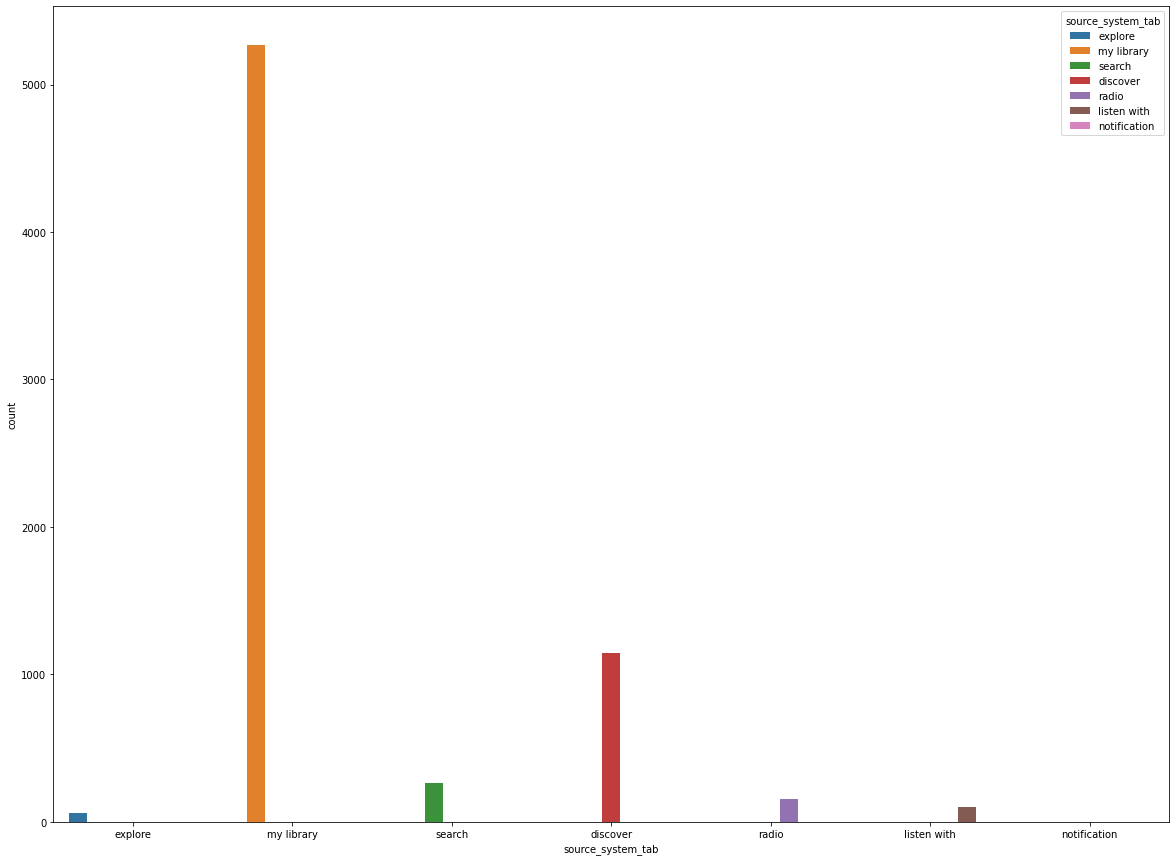

In [23]:
plt.figure(figsize=(20,15))
sns.countplot(x=train['source_system_tab'],hue=train['source_system_tab'])

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

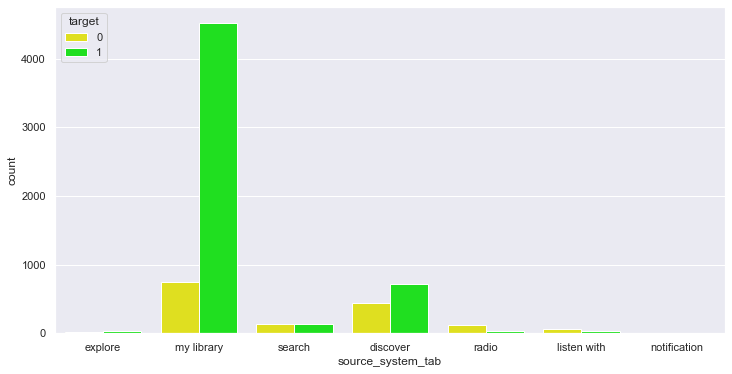

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x=train['source_system_tab'],palette=['yellow','lime'],hue=train['target'])

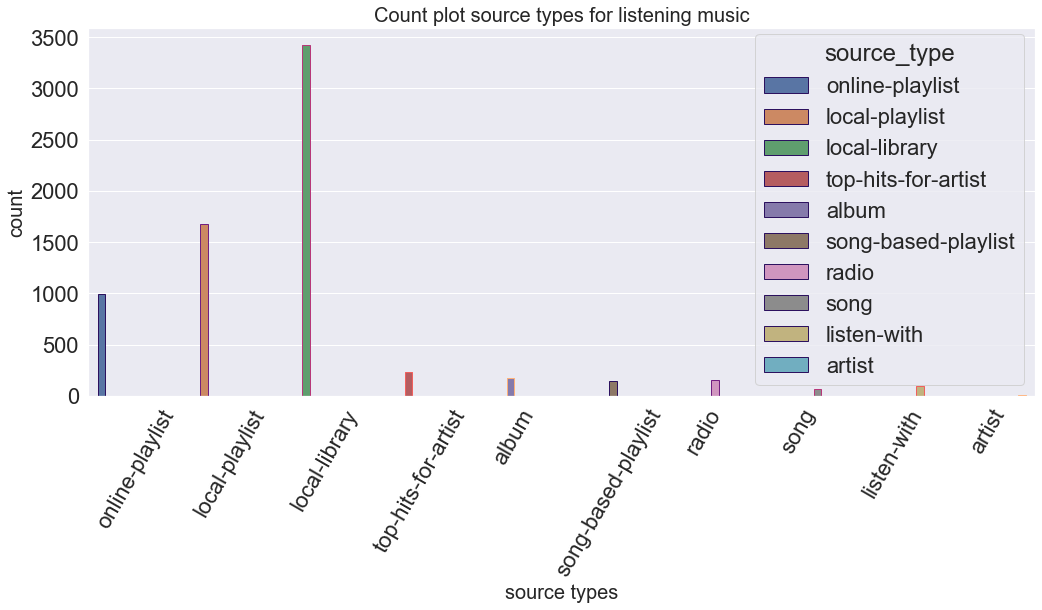

In [34]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,edgecolor=sns.color_palette('magma',5))
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='60')
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()


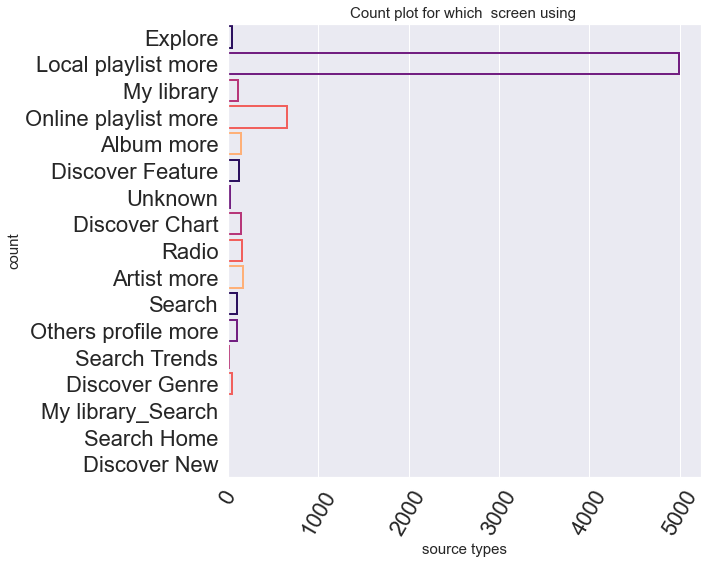

In [26]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='60')
plt.title('Count plot for which  screen using ',fontsize=15)
plt.tight_layout()


In [27]:
def count_plot(data, x, hue, type):
  plt.figure(figsize = (15, 8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.tight_layout()

In [29]:
# Function to plot histograms for categories

def count_plot_function(data, x):
  plt.figure(figsize = (15,10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

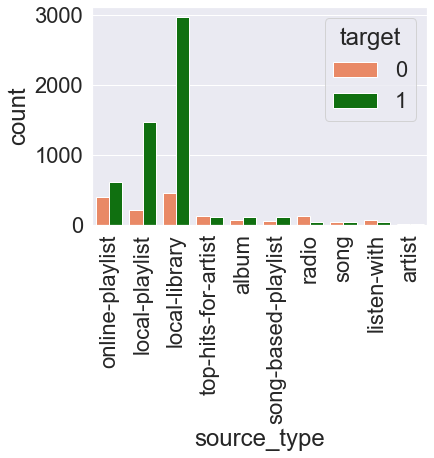

In [36]:
sns.countplot(x = train['source_type'],palette=['coral','green'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

<AxesSubplot:xlabel='language', ylabel='count'>

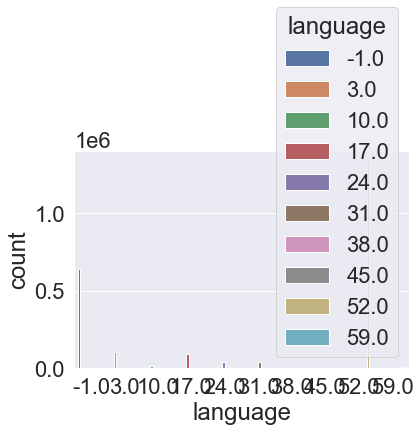

In [40]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')